# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Лабораторная работа 4.1

In [ ]:
import xlwings as xw

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [ ]:
import csv
import pandas as pd
reviews = pd.read_csv('/Users/Admin/Downloads/reviews_sample.csv', index_col = 0)
reviews = reviews.reset_index(drop = True)
reviews.head()

,user_id,recipe_id,date,rating,review
0,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [ ]:
recipes = pd.read_csv('/Users/Admin/Downloads/recipes_sample (1).csv')
recipes = recipes[['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']]
recipes.head()

,id,name,minutes,submitted,description,n_ingredients
0,44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [ ]:
rev = reviews.sample(int(len(reviews)*0.05)); rev

,user_id,recipe_id,date,rating,review
9443,318547,405119,2010-04-26,5,I can't believe no one has used this one. Love...
123337,36944,76540,2006-10-06,5,I have been making this recipe for years. Any ...
118127,122276,49744,2010-05-15,5,"Oh, how yummy these were! I make deviled eggs..."
4153,594923,184501,2007-11-07,4,"This was a really tasty, warming soup. I used ..."
102013,594139,294205,2008-11-19,5,All I can say is WOW!! We loved this I did not...
...,...,...,...,...,...
90361,623399,64435,2008-07-18,5,This bread is AWESOME! My bf and I are so add...
80543,694899,196139,2008-01-15,3,i had to use the frying pan so maybe thats why...
80604,364685,227090,2007-05-21,4,This was a very tasty dish and surprisingly ea...
34735,556250,233314,2008-03-12,5,"These are awesome April Joy, I like to add fi..."


In [ ]:
rec = recipes.sample(int(len(recipes)*0.05)); rec

,id,name,minutes,submitted,description,n_ingredients
8888,357992,cube steaks and excellent gravy,485,2009-02-26,this is a great recipe!,5.0
15332,347632,kick butt spaghetti sauce out of a jar,20,2009-01-07,this is a conncoction i came up with tonight; ...,NaN
20196,96074,peanut butter and apple burrito,2,2004-07-21,a recipe we co-created with my young nephew in...,6.0
19335,370865,orange ginger float,4,2009-05-08,great for summer.,NaN
9045,114939,curry turkey burgers by rachael ray,30,2005-04-01,i saw rachael ray make these one day on tv. i...,NaN
...,...,...,...,...,...,...
24318,442306,simply delicious lasagna,75,2010-11-18,"the best lasagna you've ever had, and so simpl...",NaN
28559,11839,veal parmesan,60,2001-09-20,a classic,NaN
21104,101059,pomegranate pie,220,2004-10-01,make this dessert in the morning and it will b...,NaN
19717,403885,pampered chef pecan tassies,30,2009-12-15,this is one of the pampered chef recipes using...,NaN


In [ ]:
from pandas import ExcelWriter 

with ExcelWriter('/Users/Admin/Downloads/recipes.xlsx') as f:
    rec.to_excel(f, sheet_name = 'Рецепты')
    rev.to_excel(f, sheet_name = 'Отзывы')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [ ]:
x = xw.Book('recipes.xlsx')
sht1 = xw.sheets('Рецепты')
sht2 = xw.sheets('Отзывы')

In [ ]:
import numpy as np
sht1.range('H1').value = 'seconds_assign'
sht1.range('H2').options(transpose = True).value = sht1.range('D2').expand('down').options(np.array).value*60

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [ ]:
sht1.range('I1').value = 'seconds_formula'
sht1.range('I2:I1501').formula = '=D2*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [ ]:
sht1.range('A1:I1501').columns.autofit()
sht1['A1:I1501'].api.Borders.Weight = 2
sht1['H1:I1501'].font.bold = True

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [ ]:
for i in sht1.range('D2:D1501').expand('down'):
#     print(i)
    if i.value < 5:
        i.color = (0,128,0)
    elif i.value >= 5 and i.value < 10:
        i.color = (255,255,0)
    else:
        i.color = (255,0,0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [ ]:
sht1.range('J1').value = 'n_reviews'

In [ ]:
sht1.range('J2:J1501').formula = '=COUNTIF(Отзывы!$B$2:$B$6335, A2)'  # ищем по 2 листу кол-во recipe_id = > столько отзывов на рецепт

## Лабораторная работа 4.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [ ]:
def validate(sht):
    for i in sht.range('E2:E6335').expand('down'):
        if i.value < 0 and i.value > 5:
            i.color = (255, 0, 0)
validate(sht2)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [ ]:
rec_mod = pd.read_csv('/Users/Admin/Downloads/recipes_model.csv', encoding = 'UTF-8', delimiter = '\t')
rec_mod.head()

,recipe,name,varchar(100),Y,Рецепт,Название рецепта,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,recipe,id,serial,N,Рецепт,ID рецепта,PK,NaN,NaN
1,recipe,minutes,int,Y,Рецепт,Длительность выполнения в минутах,NaN,NaN,NaN
2,recipe,contributor_id,int,Y,Рецепт,ID автора рецепта,FK,user,id
3,recipe,submitted,timestamp,Y,Рецепт,Дата добавления,NaN,NaN,NaN
4,recipe,n_steps,int,N,Рецепт,Кол-во шагов рецепта,NaN,NaN,NaN


In [ ]:
with ExcelWriter('/Users/Admin/Downloads/recipes_model.xlsx') as f:
    rec_mod.to_excel(f, sheet_name = 'Модель')

In [ ]:
x = xw.Book(f)
sht_rec_mod = xw.sheets['Модель']

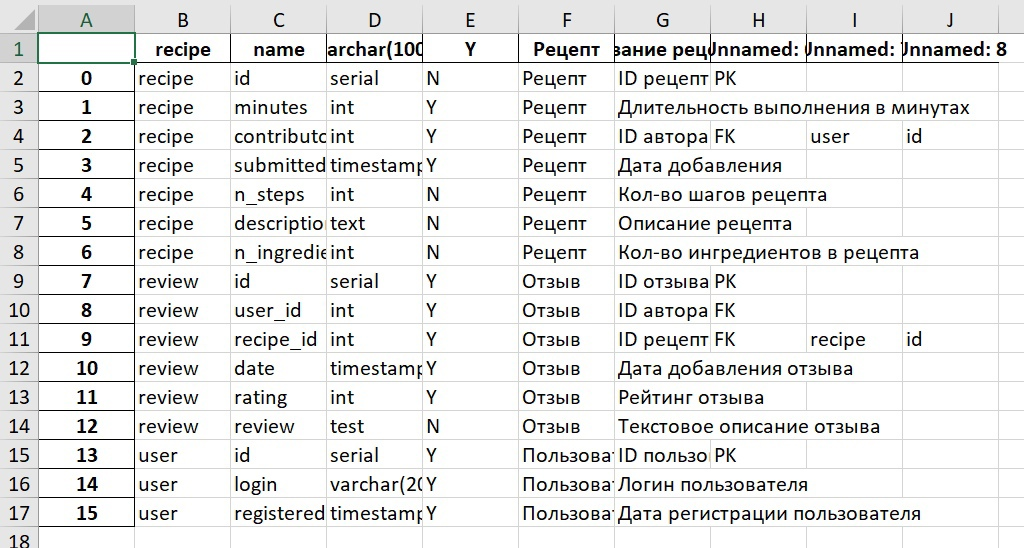

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
fml = xw.Range('J2').formula = f'=B2&" "&C2&" PRIMARY KEY"'
xw.Range('J2').formula = fml
fml = xw.Range('J3').formula = f'=B3&" "&C3'
xw.Range('J3').formula = fml 
fml = xw.Range('J4').formula = f'="REFERENCES "&B4&" "&C4&" "&H4&" "&I4&" NOT NULL"'
xw.Range('J4').formula = fml
fml = xw.Range('J5').formula = f'=B5&" "&C5'
xw.Range('J5:J8').formula = fml     
fml = xw.Range('J9').formula = f'=B9&" "&C9&" PRIMARY KEY"'
xw.Range('J9').formula = fml      
fml = xw.Range('J10').formula = f'="REFERENCES "&B10&" "&C10&" "&H10&" "&I10&" NOT NULL"'
xw.Range('J10:J11').formula = fml
fml = xw.Range('J12').formula = f'=B12&" "&C12'
xw.Range('J12:J14').formula = fml    
fml = xw.Range('J15').formula = f'=B15&" "&C15&" PRIMARY KEY"'
xw.Range('J15').formula = fml    
fml = xw.Range('J16').formula = f'=B16&" "&C16'
xw.Range('J16:J17').formula = fml
sht_rec_mod.range('A1:J15').columns.autofit()

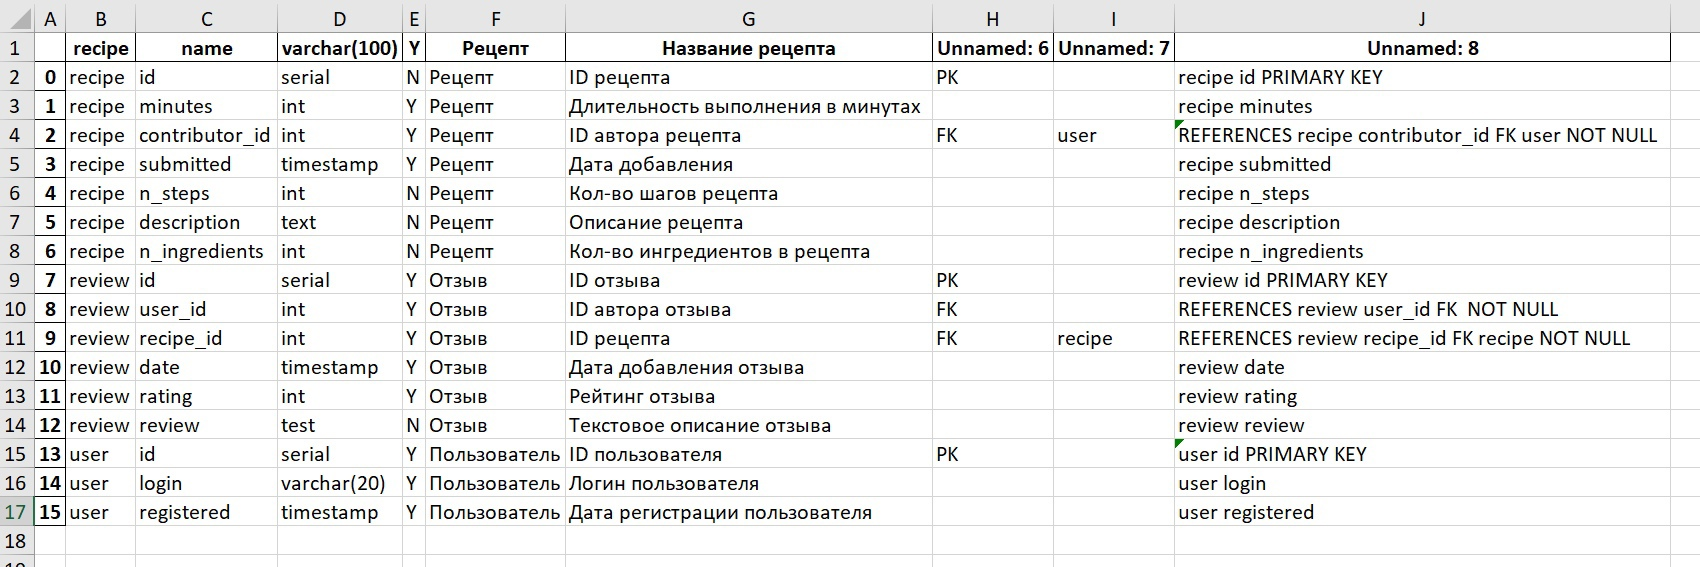

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
sht_rec_mod.range('A1:J1').color = (0, 204, 255)
sht_rec_mod.range('A1:J15').autofit()
sht_rec_mod.range('A1:J1').font.bold = True
sht_rec_mod.range('A1:J1').api.Autofilter

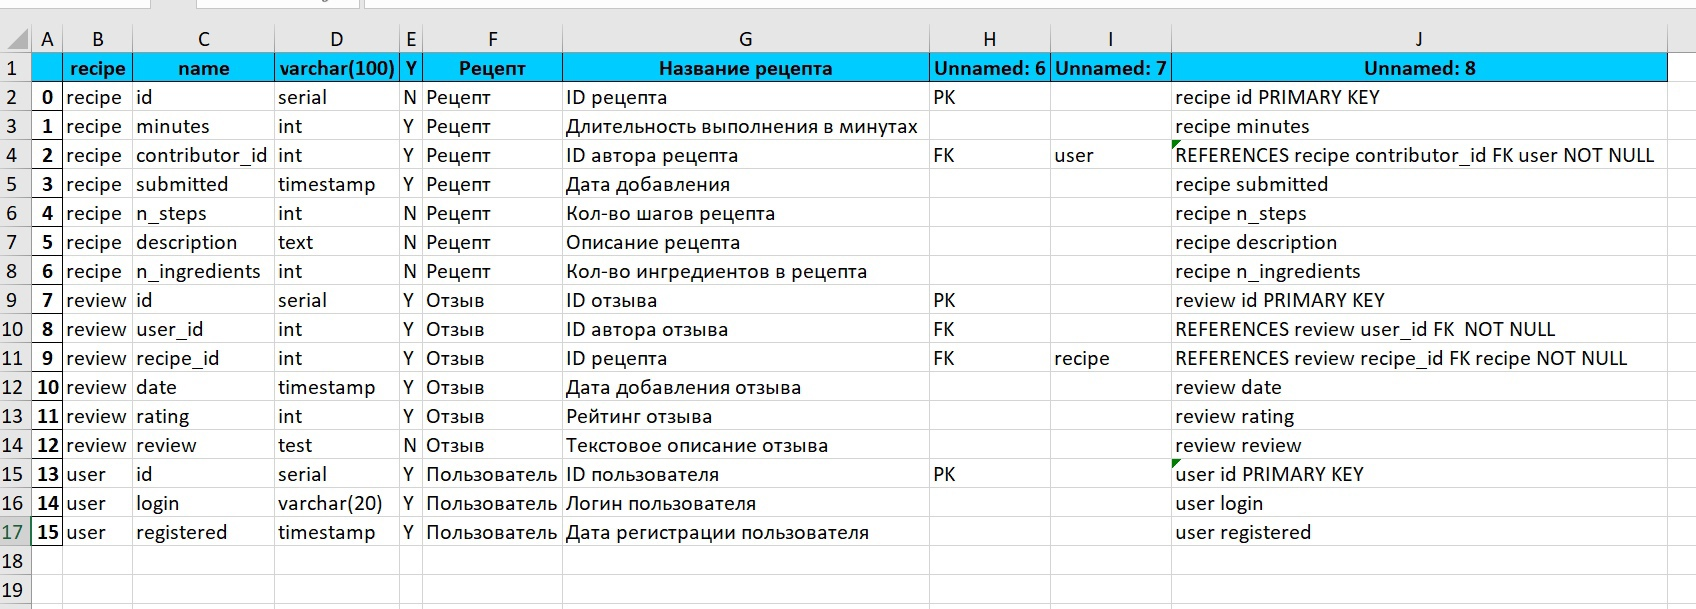

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 